In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("scholarship.csv")

In [3]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\achyu\AppData\Local\Temp\ipykernel_17652\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\achyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

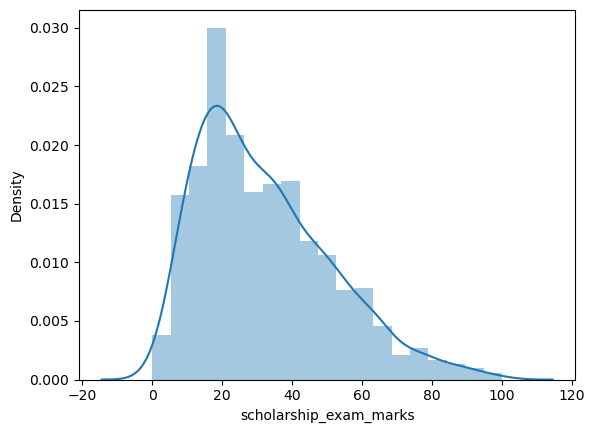

In [5]:
sns.distplot(data["scholarship_exam_marks"])

In [6]:
data["scholarship_exam_marks"].skew()

0.8356419499466834

In [7]:
data["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

<Axes: >

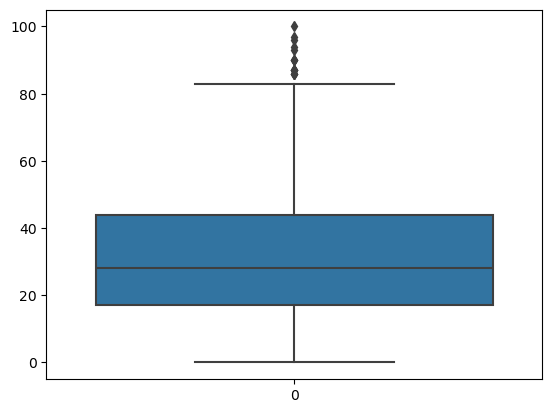

In [8]:
sns.boxplot(data["scholarship_exam_marks"])

In [13]:
percentile25 = data["scholarship_exam_marks"].quantile(0.25)
percentile75 = data["scholarship_exam_marks"].quantile(0.75)

In [14]:
IQR = percentile75 - percentile25

In [15]:
min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR

In [18]:
#trimming
new_data = data[(data["scholarship_exam_marks"]>min)&(data["scholarship_exam_marks"])]

In [19]:
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship
4,72.3,17,0
5,73.0,23,1
6,66.9,11,0
7,71.2,39,1
11,63.8,7,1
...,...,...,...
990,61.7,33,1
991,70.4,57,0
993,67.3,21,1
994,64.8,63,0


In [20]:
min

-23.5

In [21]:
max

84.5

C:\Users\achyu\AppData\Local\Temp\ipykernel_17652\713509279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\achyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


NameError: name 'data_new' is not defined

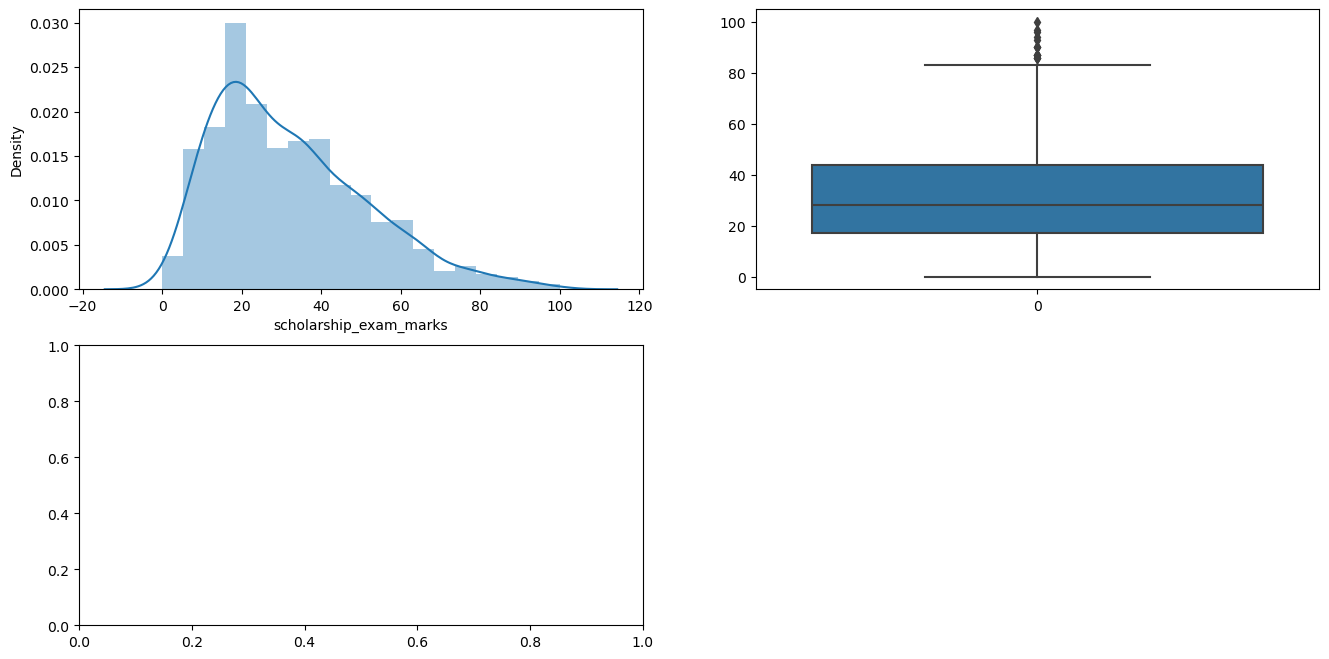

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])
plt.subplot(2,2,3)
sns.distplot(data_new["scholarship_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(data_new["scholarship_exam_marks"])
plt.show()

In [24]:
#capping
new_data2 = data.copy()
new_data2["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max,
         max, 
         np.where(data["scholarship_exam_marks"]<min,min, data["scholarship_exam_marks"]))

In [25]:
new_data2.shape

(1000, 3)

In [26]:
new_data2["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: scholarship_exam_marks, dtype: float64